## Problem Information

**Dataset:** Students' Dropout and Academic Success

**Source:** [UCI Machine Learning Repository] (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

**Task:** Supervised Learning Problem - Classification


This dataset contains student records with features related to their demographics, academic performance, and enrollment. 

**Target Variable:** Indicates whether a student successfully graduated, dropped out, or is still enrolled. 

**Aim:** To predict student outcomes based on these features.

## Importing Libraries

In [218]:
import pandas as pd # Data Manipulation and Analysis 
import seaborn as sns # Statistical visualisations/ graphics
import numpy as np # Mathematical functions
from sklearn.preprocessing import LabelEncoder # Mapping categorical values to unique integers
from sklearn.model_selection import train_test_split # Dataset splitting

## Data Aqcuistion and Initial Preparation

### Dataset Import

In [40]:
# Read CSV dataset into a DataFrame
df = pd.read_csv("data/data.csv", delimiter=";")
# Check first 10 rows
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [41]:
# Rename columns for clarity
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age', 'Daytime/evening attendance\t':'Daytime/Evening'}, inplace = True)

In [42]:
# Check if any null values present in the dataset
df.isnull().any().any()

np.False_

In [43]:
# Check column datatypes
df.dtypes.reset_index().rename(columns={"index":"Column", 0:"Datatype"}) 

,Column,Datatype
0,Marital status,int64
1,Application mode,int64
2,Application order,int64
3,Course,int64
4,Daytime/Evening,int64
5,Previous qualification,int64
6,Previous qualification (grade),float64
7,Nationality,int64
8,Mother's qualification,int64
9,Father's qualification,int64


## Exploratory Data Analysis (EDA)

In [ ]:
df_eda = df.copy(deep=True)
# Descriptive Statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/Evening,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Count of Graduates: 2209
Count of Enrolled: 794
Count of Dropout: 1421


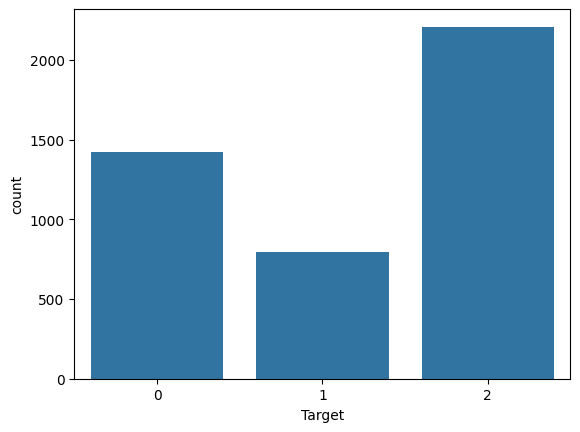

In [199]:
# Barplot of target veriable class count
sns.countplot(data=df_eda, x='Target')

# Target class counts displayed
grad_count = df_eda['Target'].value_counts().get(2)
enrol_count = df_eda['Target'].value_counts().get(1)
dropout_count = df_eda['Target'].value_counts().get(0)
print(f'''Count of Graduates: {grad_count}
Count of Enrolled: {enrol_count}
Count of Dropout: {dropout_count}''')

In [200]:
df_eda['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

## Data Preparation

### Data Preprocessing

### Data Splitting

In [ ]:
# Create copy to keep raw data for validation and reproducibility 
df_preprocessed = df_eda.copy(deep=True)

# Dataset Splitting 
X = df_preprocessed.drop(columns=['Target']) # All features excluding target (y)
y = df_preprocessed['Target'] # Target/predictive feature
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% train, 20% test
    stratify=y,      
    random_state=42 # Reproducible seed
)

### Encoding

In [ ]:
# Identify categorical (non-continous) columns
list(set(df_preprocessed.columns) - set(df_preprocessed.describe().columns))

['Target']

In [ ]:
# Check classes in target variable 
df_preprocessed['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [219]:
# Map categorical target variable to unique numerical variable with label encoding 
le = LabelEncoder() # Instantiate object

# Apply encoding of "Target" to train and test data 
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Check encoding has applied
print(le.classes_, np.unique(y_test_encoded)) 

['Dropout' 'Enrolled' 'Graduate'] [0 1 2]


## Feature Engineering

In [ ]:
df_feen = df_preprocessed.copy(deep=True)

0         1
1         1
2         1
3         1
4         1
       ... 
4419      1
4420    105
4421      1
4422      1
4423     22
Name: Nationality, Length: 4424, dtype: int64

### Feature mappings

In [ ]:
# Number of unique non-binary categories - columns that may require aggregation 
df_feen.nunique()[(df_feen.nunique() > 2) # Filter > 2 
                               & (~df_feen.nunique().index.str.contains("grade|units|rate|GDP", case=False)) # Exclude numerical variables i.e. 'grade' 
                               & (~df_feen.nunique().index.isin(["Age", "Application order", "Target"]))]

Marital status             6
Application mode          18
Course                    17
Previous qualification    17
Nationality               21
Mother's qualification    29
Father's qualification    34
Mother's occupation       32
Father's occupation       46
dtype: int64

In [ ]:
# Feature mappings (for aggregation purposes)
# Marital Status
marital_mapping = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Common-law marriage",
    6: "Legally separated"
}

# Application Mode
appl_mode_mapping = {
    1: "1st Phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st Phase - Special Contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st Phase - Special Contingent (Madeira Island)",
    17: "2nd Phase - General Contingent",
    18: "3rd Phase - General Contingent",
    26: "Ordinance No. 533-A/99, item b2 (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

# Nationality 
nationality_mapping = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldovan",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Previous/ Mother's/ Father's Qualification
prev_qual_mapping = {
    1: "Secondary Education - 12th Year or Eq.",
    2: "Higher Education - Bachelor's",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    13: "2nd Year Complementary High School",
    14: "10th Year",
    15: "10th Year - Not Completed",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th–11th)",
    20: "Complementary High School Course",
    22: "Technical-professional Course",
    25: "Complementary High School - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle General High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    31: "General Course of Administration & Commerce",
    33: "Supplementary Accounting & Administration",
    34: "Unknown",
    35: "Illiterate",
    36: "Can Read (without 4th Year)",
    37: "Basic Education 1st Cycle (4th–5th)",
    38: "Basic Education 2nd Cycle (6th–8th)",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

# Parent's occupation 
occupation_mapping = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "Teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

In [ ]:
def cross_ref_mappings(mapping_name, column_name, df):
    # Cross-reference columns and mappings
    mapped_codes = set(mapping_name.keys())
    # Unique codes in father and mother occupation columns
    target_codes = set(df[column_name].unique())

    # Check for missing codes
    missing_codes = (target_codes) - mapped_codes

    # Statement 
    if missing_codes:
        return column_name, missing_codes, True
    else: 
        return column_name, missing_codes, False

# Each attribute pair 
cat_params = [
                (marital_mapping, "Marital status"), 
                (appl_mode_mapping, "Application mode"),
                (prev_qual_mapping, "Previous qualification"),
                (nationality_mapping, "Nationality"),
                (prev_qual_mapping, "Mother's qualification"),
                (prev_qual_mapping, "Father's qualification"),
                (occupation_mapping, "Mother's occupation"),
                (occupation_mapping, "Father's occupation")
            ]

ref_results = "" # Concatenate full results
missing_results = "Missing codes for" # Concatenate missing codes for columns
non_missing_cols = "No missing codes for" # Concatenate non-missing columns

missing_count = 0 # Missing count
for x, y in cat_params:
    column_name, missing_codes, missing = cross_ref_mappings(x, y, df_feen)
    if missing:
        missing_results = missing_results + ", " + column_name + ": " +  ", ".join(str(int(v)) for v in missing_codes)
        missing_count = missing_count + 1
    else: 
        non_missing_cols = non_missing_cols + ", " +column_name

# Shows if any mappings are misisng
if missing:
    ref_results = ref_results + missing_results + "."

# Only shows if not all mappings are missing
if missing_count < 6:
    ref_results = ref_results + "\n" + non_missing_cols + "."

print(ref_results)


No missing codes for, Marital status, Application mode, Previous qualification, Nationality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation.


In [ ]:
# Aggregate nationalities
df_eda['Nationality'].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17])

## Model Training